In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from scipy import stats as sps
from scipy.interpolate import interp1d
import logging

from IPython.display import clear_output
import matplotlib.font_manager as fm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import altair as alt

In [4]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [5]:
dataset = pd.read_csv('datasetcv.csv')
dataset.head()

,Date,Positive
0,2020-03-08,3
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0


In [6]:
datasetxl = pd.read_excel('dataset.xlsx','Sheet1')
datasetxl = datasetxl.dropna(how='all', axis='columns')
datasetxl = datasetxl.loc[:, ~datasetxl.columns.str.contains('^Unnamed',na=False)]
datasetxl = datasetxl.drop([0,67,68,69])
datasetxl.to_csv("dataset.csv")
datasetxl = pd.read_csv("dataset.csv",header=None)
datasetxl = datasetxl.transpose()
datasetxl = datasetxl.drop([0,1])
datasetxl = datasetxl.reindex(index=datasetxl.index[::-1])
datasetxl.columns=["Date","B. Baria","Bagerhat","Bandarban","Barguna","Barisal","Bhola","Bogra","Chandpur","Chapainawabganj","Chattogram","Chuadanga","Cox’s bazar","Cumilla","Dhaka (District)","Dhaka City","Dinajpur","Faridpur","Feni","Gaibandha","Gazipur","Gopalganj","Habiganj","Jamalpur","Jessore","Jhalokathi","Jhenaidah","Joypurhat","Khagrachhari","Khulna","Kishoreganj","Kurigram","Kushtia","Lakshmipur","Lalmonirhat","Madaripur","Magura","Manikganj","Meherpur","Moulvibazar","Munshiganj","Mymensingh","Naogaon","Narail","Narayanganj","Narsingdi","Natore","Netrokona","Nilphamari","Noakhali","Pabna","Panchagarh","Pirojpur","Potuakhali","Rajbari","Rajshahi","Rangamati","Rangpur","Satkhira","Shariatpur","Sherpur","Sirajganj","Sunamganj","Sylhet","Tangail","Thakurgaon","total"]
datasetxl['Date'] = pd.to_datetime(datasetxl['Date']).dt.strftime('%Y-%m-%d')
districts = ['B. Baria','Bagerhat','Bandarban','Barguna','Barisal','Bhola','Bogra','Chandpur','Chapainawabganj','Chattogram','Chuadanga','Cox’s bazar','Cumilla','Dhaka (District)','Dhaka City','Dinajpur','Faridpur','Feni','Gaibandha','Gazipur','Gopalganj','Habiganj','Jamalpur','Jessore','Jhalokathi','Jhenaidah','Joypurhat','Khagrachhari','Khulna','Kishoreganj','Kurigram','Kushtia','Lakshmipur','Lalmonirhat','Madaripur','Magura','Manikganj','Meherpur','Moulvibazar','Munshiganj','Mymensingh','Naogaon','Narail','Narayanganj','Narsingdi','Natore','Netrokona','Nilphamari','Noakhali','Pabna','Panchagarh','Pirojpur','Potuakhali','Rajbari','Rajshahi','Rangamati','Rangpur','Satkhira','Shariatpur','Sherpur','Sirajganj','Sunamganj','Sylhet','Tangail','Thakurgaon','total']
datasetxl[districts] = datasetxl[districts].fillna(0.0)
datasetxl[districts] = datasetxl[districts].apply(pd.to_numeric, errors='coerce')
datasetxl[districts] = datasetxl[districts].cumsum()

In [7]:
datasetxl

,Date,B. Baria,Bagerhat,Bandarban,Barguna,Barisal,Bhola,Bogra,Chandpur,Chapainawabganj,...,Rangpur,Satkhira,Shariatpur,Sherpur,Sirajganj,Sunamganj,Sylhet,Tangail,Thakurgaon,total
87,2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
86,2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
85,2020-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
84,2020-03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
83,2020-03-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
82,2020-03-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81,2020-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
80,2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
79,2020-03-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
78,2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


In [8]:
dataSeries = pd.Series(dataset['Positive'].values, index=dataset['Date'])
dataSeries

Date
2020-03-08       3
2020-03-09       0
2020-03-10       0
2020-03-11       0
2020-03-12       0
2020-03-13       0
2020-03-14       2
2020-03-15       0
2020-03-16       3
2020-03-17       2
2020-03-18       4
2020-03-19       4
2020-03-20       2
2020-03-21       4
2020-03-22       3
2020-03-23       6
2020-03-24       6
2020-03-25       0
2020-03-26       5
2020-03-27       5
2020-03-28       0
2020-03-29       0
2020-03-30       0
2020-03-31       2
2020-04-01       3
2020-04-02       2
2020-04-03       5
2020-04-04       9
2020-04-05      18
2020-04-06      35
              ... 
2020-05-01     571
2020-05-02     552
2020-05-03     665
2020-05-04     688
2020-05-05     786
2020-05-06     790
2020-05-07     706
2020-05-08     709
2020-05-09     636
2020-05-10     887
2020-05-11    1034
2020-05-12     969
2020-05-13    1162
2020-05-14    1041
2020-05-15    1202
2020-05-16     930
2020-05-17    1273
2020-05-18    1602
2020-05-19    1251
2020-05-20    1617
2020-05-21    1773
2020-05

In [12]:
#hide_input
def prepare_cases(cases, cutoff=5):
    new_cases = cases.diff()

    smoothed = new_cases.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round()
    
    idx_start = np.searchsorted(smoothed, cutoff)[0]
    
    smoothed = smoothed.iloc[idx_start:]
    original = new_cases.loc[smoothed.index]
    
    return original, smoothed
country_name = 'Bangladesh'

dataSeries = pd.Series(datasetxl['total'].values, index=datasetxl['Date'])

original, smoothed = prepare_cases(dataSeries)


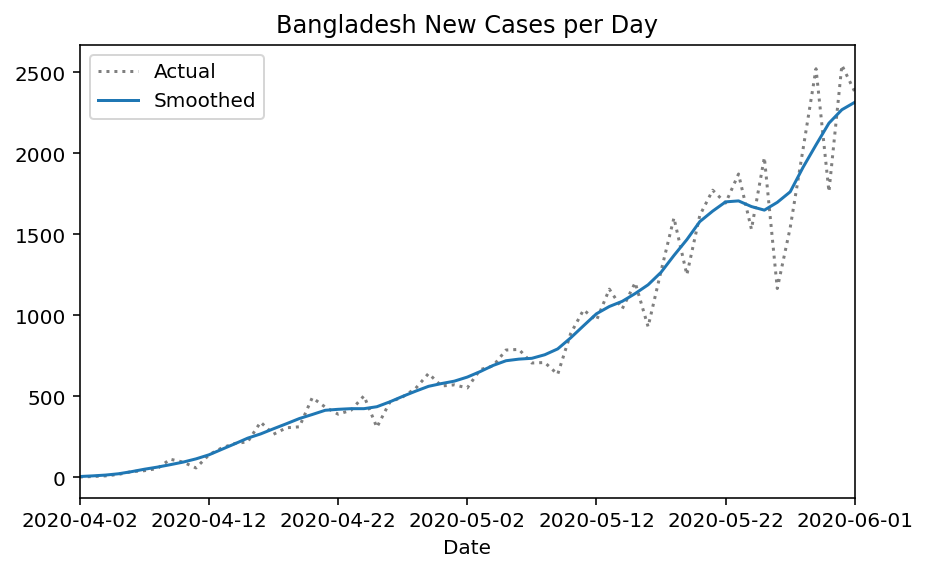

In [13]:
original.plot(title="Bangladesh New Cases per Day",
               c='k',
               linestyle=':',
               alpha=.5,
               label='Actual',
               legend=True,
             figsize=(500/72, 300/72))

ax = smoothed.plot(label='Smoothed',
                   legend=True)

ax.get_figure().set_facecolor('w')

In [11]:
smoothed

Date
2020-04-02       5.0
2020-04-03       9.0
2020-04-04      14.0
2020-04-05      22.0
2020-04-06      35.0
2020-04-07      50.0
2020-04-08      63.0
2020-04-09      78.0
2020-04-10      94.0
2020-04-11     114.0
2020-04-12     139.0
2020-04-13     173.0
2020-04-14     207.0
2020-04-15     242.0
2020-04-16     268.0
2020-04-17     300.0
2020-04-18     331.0
2020-04-19     363.0
2020-04-20     388.0
2020-04-21     414.0
2020-04-22     420.0
2020-04-23     424.0
2020-04-24     424.0
2020-04-25     436.0
2020-04-26     466.0
2020-04-27     500.0
2020-04-28     532.0
2020-04-29     562.0
2020-04-30     579.0
2020-05-01     594.0
               ...  
2020-05-03     653.0
2020-05-04     691.0
2020-05-05     720.0
2020-05-06     730.0
2020-05-07     735.0
2020-05-08     757.0
2020-05-09     793.0
2020-05-10     861.0
2020-05-11     936.0
2020-05-12    1010.0
2020-05-13    1055.0
2020-05-14    1087.0
2020-05-15    1135.0
2020-05-16    1189.0
2020-05-17    1266.0
2020-05-18    1370.0
2020-05-

In [14]:
#hide_input

# We create an array for every possible value of Rt
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)

# Gamma is 1/serial interval
# https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article
# https://www.nejm.org/doi/full/10.1056/NEJMoa2001316
GAMMA = 1/7

In [15]:
#hide_input
def get_posteriors(sr, sigma=0.15):

    # (1) Calculate Lambda
    # Map Rt into lambda so we can substitute it into the equation below
    # Note that we have N-1 lambdas because on the first day of an outbreak
    # you do not know what to expect.
    lam = sr[:-1].values * np.exp(GAMMA * (r_t_range[:, None] - 1))

    
    # (2) Calculate each day's likelihood
    likelihoods = pd.DataFrame(
        data = sps.poisson.pmf(sr[1:].values, lam),
        index = r_t_range,
        columns = sr.index[1:])
    
    # (3) Create the Gaussian Matrix
    process_matrix = sps.norm(loc=r_t_range,
                              scale=sigma
                             ).pdf(r_t_range[:, None]) 

    # (3a) Normalize all rows to sum to 1
    process_matrix /= process_matrix.sum(axis=0)
    
    # (4) Calculate the initial prior
    #prior0 = sps.gamma(a=4).pdf(r_t_range)
    prior0 = np.ones_like(r_t_range)/len(r_t_range)
    prior0 /= prior0.sum()

    # Create a DataFrame that will hold our posteriors for each day
    # Insert our prior as the first posterior.
    posteriors = pd.DataFrame(
        index=r_t_range,
        columns=sr.index,
        data={sr.index[0]: prior0}
    )
    
    # We said we'd keep track of the sum of the log of the probability
    # of the data for maximum likelihood calculation.
    log_likelihood = 0.0

    # (5) Iteratively apply Bayes' rule
    for previous_day, current_day in zip(sr.index[:-1], sr.index[1:]):

        #(5a) Calculate the new prior
        current_prior = np.dot(process_matrix, posteriors[previous_day])
        
        #(5b) Calculate the numerator of Bayes' Rule: P(k|R_t)P(R_t)
        numerator = likelihoods[current_day] * current_prior
        
        #(5c) Calcluate the denominator of Bayes' Rule P(k)
        denominator = np.sum(numerator)
        
        # Execute full Bayes' Rule
        posteriors[current_day] = numerator/denominator
        
        # Add to the running sum of log likelihoods
        log_likelihood += np.log(denominator)
    
    return posteriors, log_likelihood

# Note that we're fixing sigma to a value just for the example
posteriors, log_likelihood = get_posteriors(smoothed, sigma=.25)

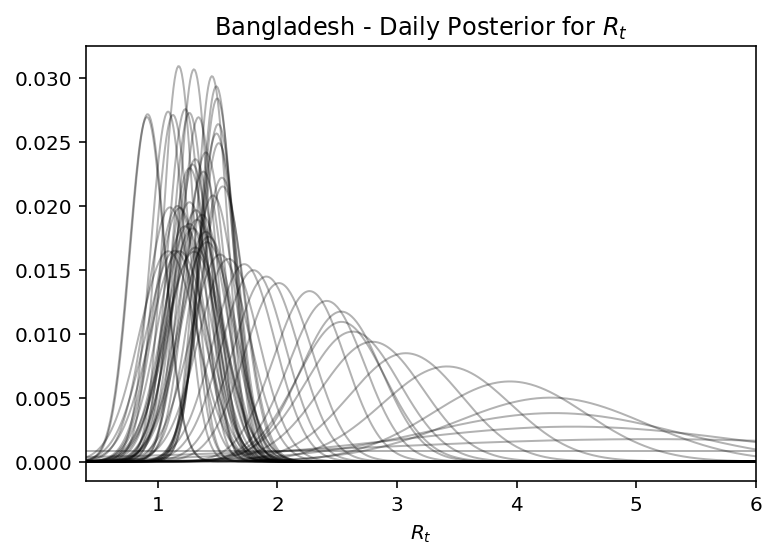

In [16]:
ax = posteriors.plot(title='Bangladesh - Daily Posterior for $R_t$',
           legend=False, 
           lw=1,
           c='k',
           alpha=.3,
           xlim=(0.4,6))

ax.set_xlabel('$R_t$');

In [17]:
posteriors

Date,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01
0.00,0.000833,0.000182,4.277046e-05,2.967724e-06,3.050457e-08,5.817861e-10,1.548788e-10,4.302137e-11,2.597432e-11,9.392085e-12,...,7.292502e-14,1.962618e-10,3.285405e-10,1.703133e-14,2.997384e-17,1.370359e-25,6.554150e-27,5.141598e-27,6.173548e-23,1.906786e-19
0.01,0.000833,0.000188,4.453221e-05,3.116781e-06,3.248360e-08,6.293777e-10,1.702493e-10,4.827349e-11,2.967591e-11,1.092429e-11,...,1.178254e-13,2.932073e-10,4.864814e-10,2.772419e-14,5.178295e-17,2.750513e-25,1.373619e-26,1.101995e-26,1.258949e-22,3.681655e-19
0.02,0.000833,0.000194,4.632043e-05,3.270312e-06,3.456325e-08,6.804645e-10,1.870802e-10,5.415094e-11,3.389273e-11,1.270054e-11,...,1.895746e-13,4.362009e-10,7.173745e-10,4.494598e-14,8.908683e-17,5.496937e-25,2.865629e-26,2.350446e-26,2.554233e-22,7.071227e-19
0.03,0.000833,0.000201,4.813327e-05,3.428306e-06,3.674724e-08,7.352835e-10,2.055067e-10,6.072657e-11,3.869471e-11,1.475874e-11,...,3.037372e-13,6.462031e-10,1.053480e-09,7.256761e-14,1.526232e-16,1.093840e-24,5.950797e-26,4.988929e-26,5.155719e-22,1.350997e-18
0.04,0.000833,0.000207,4.996885e-05,3.590746e-06,3.903935e-08,7.940870e-10,2.256766e-10,6.808155e-11,4.416106e-11,1.714247e-11,...,4.846079e-13,9.532799e-10,1.540654e-09,1.166844e-13,2.603791e-16,2.167257e-24,1.230070e-25,1.053777e-25,1.035362e-21,2.567551e-18
0.05,0.000833,0.000213,5.182526e-05,3.757612e-06,4.144353e-08,8.571448e-10,2.477510e-10,7.630626e-11,5.038140e-11,1.990188e-11,...,7.699382e-13,1.400357e-09,2.243782e-09,1.868525e-13,4.423522e-16,4.275522e-24,2.530938e-25,2.214993e-25,2.068553e-21,4.853853e-18
0.06,0.000833,0.000219,5.370056e-05,3.928883e-06,4.396384e-08,9.247447e-10,2.719058e-10,8.550134e-11,5.745707e-11,2.309461e-11,...,1.218126e-12,2.048434e-09,3.254250e-09,2.979882e-13,7.483502e-16,8.398230e-24,5.183562e-25,4.633141e-25,4.111596e-21,9.127555e-18
0.07,0.000833,0.000225,5.559278e-05,4.104533e-06,4.660447e-08,9.971941e-10,2.983330e-10,9.577879e-11,6.550269e-11,2.678688e-11,...,1.919099e-12,2.983790e-09,4.700174e-09,4.732730e-13,1.260707e-15,1.642496e-23,1.056740e-24,9.643978e-25,8.130570e-21,1.707340e-17
0.08,0.000833,0.000231,5.749996e-05,4.284535e-06,4.936980e-08,1.074821e-09,3.272421e-10,1.072632e-10,7.464777e-11,3.105476e-11,...,3.010716e-12,4.327885e-09,6.760331e-09,7.485739e-13,2.114922e-15,3.198429e-23,2.144365e-24,1.997616e-24,1.599542e-20,3.176733e-17
0.09,0.000833,0.000237,5.942014e-05,4.468862e-06,5.226434e-08,1.157977e-09,3.588617e-10,1.200933e-10,8.503860e-11,3.598552e-11,...,4.703349e-12,6.250895e-09,9.683022e-09,1.179142e-12,3.532997e-15,6.201304e-23,4.331297e-24,4.117566e-24,3.130635e-20,5.879413e-17


In [18]:
#hide_input
# MLE to find sigma
sigmas = np.linspace(1/20, 1, 20)

new, smoothed = prepare_cases(dataSeries, cutoff=25)
if len(smoothed) == 0:
    new, smoothed = prepare_cases(dataSeries, cutoff=10)

result = {}

# Holds all posteriors with every given value of sigma
result['posteriors'] = []

# Holds the log likelihood across all k for each value of sigma
result['log_likelihoods'] = []

for sigma in sigmas:
    posteriors, log_likelihood = get_posteriors(smoothed, sigma=sigma)
    result['posteriors'].append(posteriors)
    result['log_likelihoods'].append(log_likelihood)

clear_output(wait=True)
sigma = sigmas[np.argmax(result['log_likelihoods'])]
posteriors = result['posteriors'][np.argmax(result['log_likelihoods'])]
logging.debug("Sigma: {sigma} has highest log likelihood")
logging.debug('Done.')

In [20]:
#hide_input
# Calculate High density interval
def highest_density_interval(pmf, p=.9, debug=False):
    # If we pass a DataFrame, just call this recursively on the columns
    if(isinstance(pmf, pd.DataFrame)):
        return pd.DataFrame([highest_density_interval(pmf[col], p=p) for col in pmf],
                            index=pmf.columns)
    
    cumsum = np.cumsum(pmf.values)
    
    # N x N matrix of total probability mass for each low, high
    total_p = cumsum - cumsum[:, None]
    
    # Return all indices with total_p > p
    lows, highs = (total_p > p).nonzero()
    
    # Find the smallest range (highest density)
    best = (highs - lows).argmin()
    
    low = pmf.index[lows[best]]
    high = pmf.index[highs[best]]
    
    return pd.Series([low, high],
                     index=['Low_90',
                            'High_90'])



# Note that this takes a while to execute - it's not the most efficient algorithm
hdis = highest_density_interval(posteriors, p=.9)

most_likely = posteriors.idxmax().rename('ML')

# Look into why you shift -1
result = pd.concat([most_likely, hdis], axis=1)


In [21]:
result

,ML,Low_90,High_90
Date,,,
2020-04-06,0.00,0.00,10.81
2020-04-07,3.50,1.73,5.00
2020-04-08,2.99,1.82,4.00
2020-04-09,2.78,1.92,3.60
2020-04-10,2.61,1.88,3.27
2020-04-11,2.53,1.91,3.10
2020-04-12,2.49,1.92,2.97
2020-04-13,2.50,2.01,2.94
2020-04-14,2.43,1.99,2.83


/Users/ruhulsbu/anaconda3/lib/python3.6/site-packages/pandas/tseries/converter.py:48: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


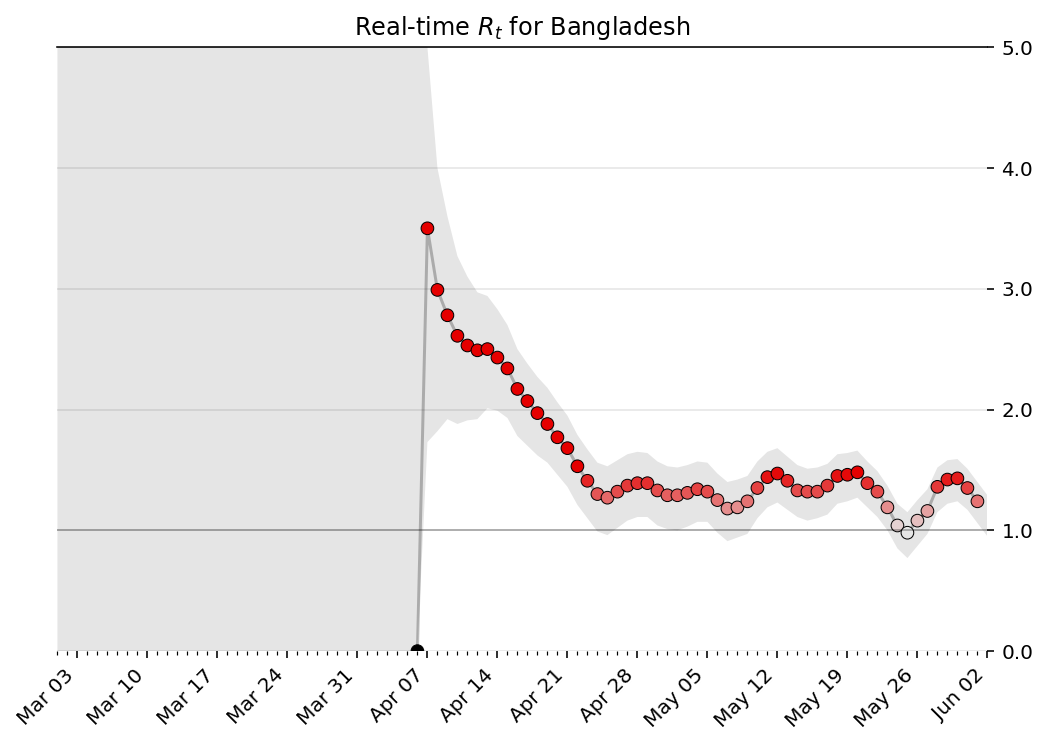

In [51]:
#hide_input
def plot_rt(result, ax, country_name):
    
    ax.set_title(str(country_name))
    
    # Colors
    ABOVE = [1,0,0]
    MIDDLE = [1,1,1]
    BELOW = [0,0,0]
    cmap = ListedColormap(np.r_[
        np.linspace(BELOW,MIDDLE,25),
        np.linspace(MIDDLE,ABOVE,25)
    ])
    color_mapped = lambda y: np.clip(y, .5, 1.5)-.5
    
    index = result['ML'].index.get_level_values('Date')
    index = index.to_datetime()
    values = result['ML'].values
    #print(index)
    
    # Plot dots and line
    ax.plot(index, values, c='k', zorder=1, alpha=.25)
    ax.scatter(index,
               values,
               s=40,
               lw=.5,
               c=cmap(color_mapped(values)),
               edgecolors='k', zorder=2)
    #"""
    # Aesthetically, extrapolate credible interval by 1 day either side
    lowfn = interp1d(date2num(index.to_datetime()),
                     result['Low_90'].values,
                     bounds_error=False,
                     fill_value='extrapolate')
    
    highfn = interp1d(date2num(index.to_datetime()),
                      result['High_90'].values,
                      bounds_error=False,
                      fill_value='extrapolate')
    
    extended = pd.date_range(start=pd.Timestamp('2020-03-01'),
                             end=index[-1]+pd.Timedelta(days=1))
    
    ax.fill_between(extended,
                    lowfn(date2num(extended)),
                    highfn(date2num(extended)),
                    color='k',
                    alpha=.1,
                    lw=0,
                    zorder=3)

    ax.axhline(1.0, c='k', lw=1, label='$R_t=1.0$', alpha=.25);
    
    # Formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.margins(0)
    ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
    ax.margins(0)
    ax.set_ylim(0.0, 5.0)
    ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp(result.index.get_level_values('Date')[-1])+pd.Timedelta(days=1))
    #"""
    fig.set_facecolor('w')
    fig.savefig('bangladesh-rt.png')  

fig, ax = plt.subplots(figsize=(600/72,400/72))
#result.index = pd.to_datetime(result.index)

plot_rt(result, ax, country_name)
_ = plt.xticks(rotation=45, ha='right')
#_ = plt.xticks(np.arange(0, len(dates), step=3))
ax.set_title('Real-time $R_t$ for ' + country_name)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


In [41]:
result.index.get_level_values('Date')[-1]

'2020-06-01'